# **Séries Temporais com Python**

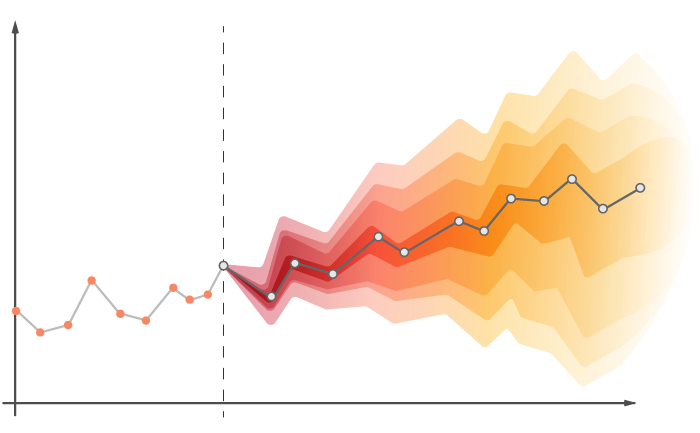

**Série temporal** é uma sequência de pontos de dados ordenados no tempo, geralmente igualmente espaçados. Cada ponto de dados na série temporal representa uma observação em um determinado momento no tempo e pode ser registrado em vários intervalos de tempo (horas, dias, meses, anos etc.).



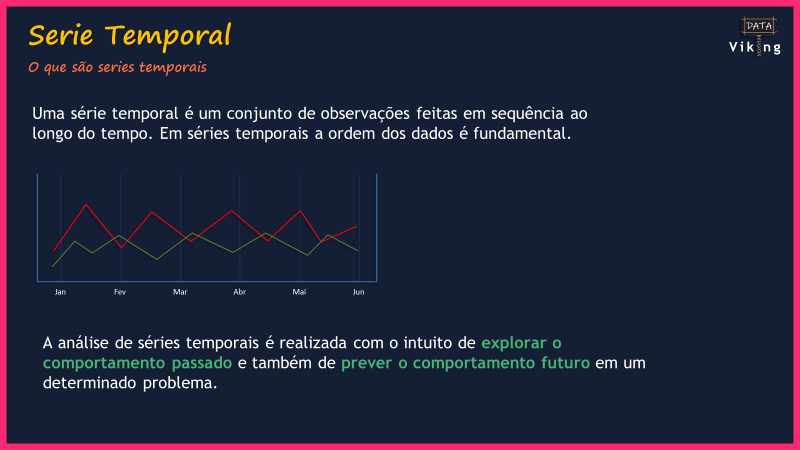

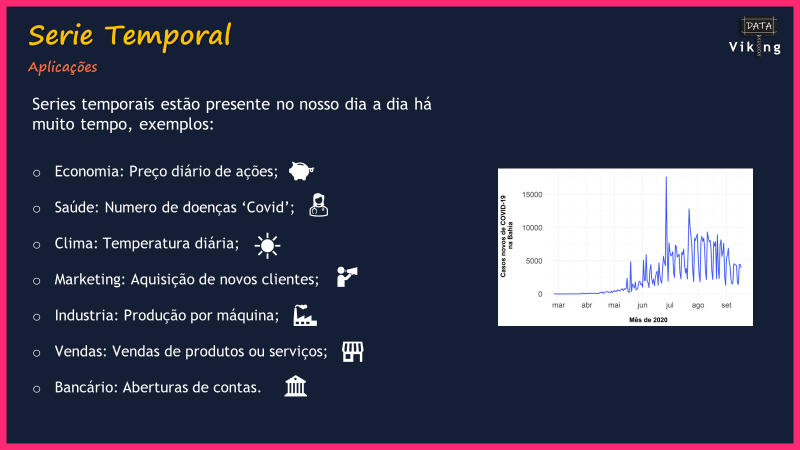

As séries temporais são amplamente utilizadas em diversas áreas, como finanças, economia, ciências sociais, meteorologia e outras. Elas permitem estudar e analisar o comportamento de um fenômeno ao longo do tempo, identificar padrões, tendências e variações sazonais. Além disso, elas são frequentemente usadas em previsão, permitindo fazer previsões futuras com base em dados históricos.

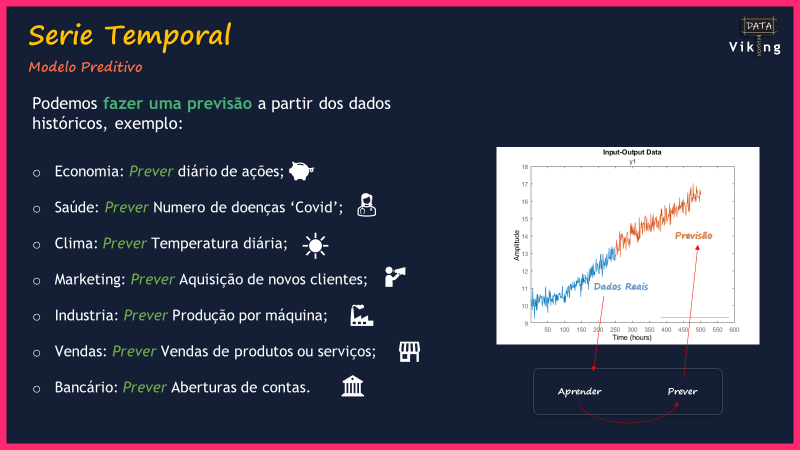

In [1]:
# Modelagem de dados
import numpy as np
import pandas as pd

# Analises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para datas
import datetime

# Lib para matematica
from math import sqrt
from scipy import stats
from statsmodels.tsa.stattools import adfuller

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Configuração no Matplotlib
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')


# Link da Base
https://drive.google.com/file/d/10f8sw1RPoNHRR1OHLJoYiqGmEwSt46zW/view?usp=sharing

**Paleta de Cores para o Matplotlib**

In [2]:
Azul = '#A5BEFA'
Vermelho = '#b3093F'
Vinho = '#451531'
Verde = '#64B7CC'
Rosa = '#FF3877'

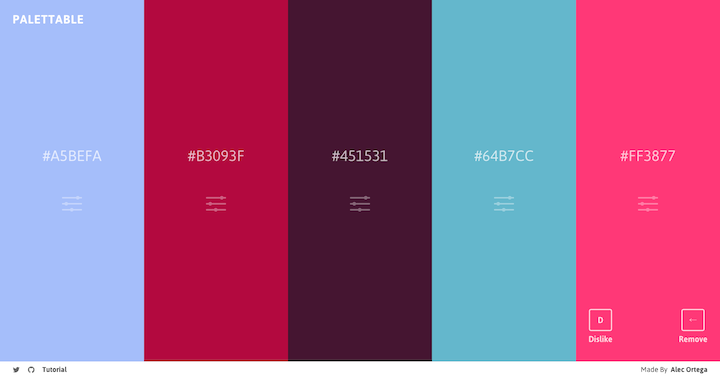

In [3]:
# Lendo a Base
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

Base_Dados = pd.read_csv( 
    'AirPassengers.csv', 
    parse_dates=['Month'], 
    index_col='Month',
    date_parser=dateparse )

In [4]:
# Dimensão
Base_Dados.shape

(144, 1)

In [5]:
# Verificar
Base_Dados.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
# Gerando os valores
Registros = Base_Dados['#Passengers'].values

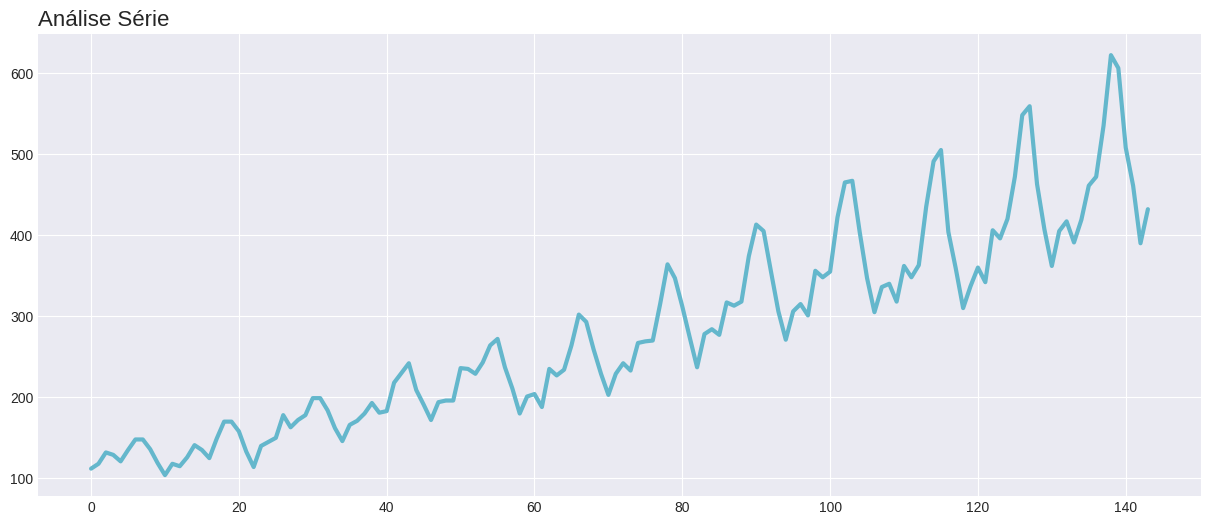

In [7]:
# Análise da Serie
plt.title('Análise Série', loc='left', fontsize=16)
plt.plot( Registros, linewidth=3, color=Verde );

## **Média constante**

A média constante é um conceito estatístico que se refere a uma série de dados em que a média dos valores não varia com o tempo. Isso significa que, ao longo da série temporal, a média dos dados é sempre a mesma, ou seja, não há tendência de aumento ou diminuição na média ao longo do tempo.

Vale ressaltar que uma média constante não significa que os valores individuais da série são constantes, mas sim que a média dos valores é constante ao longo do tempo.

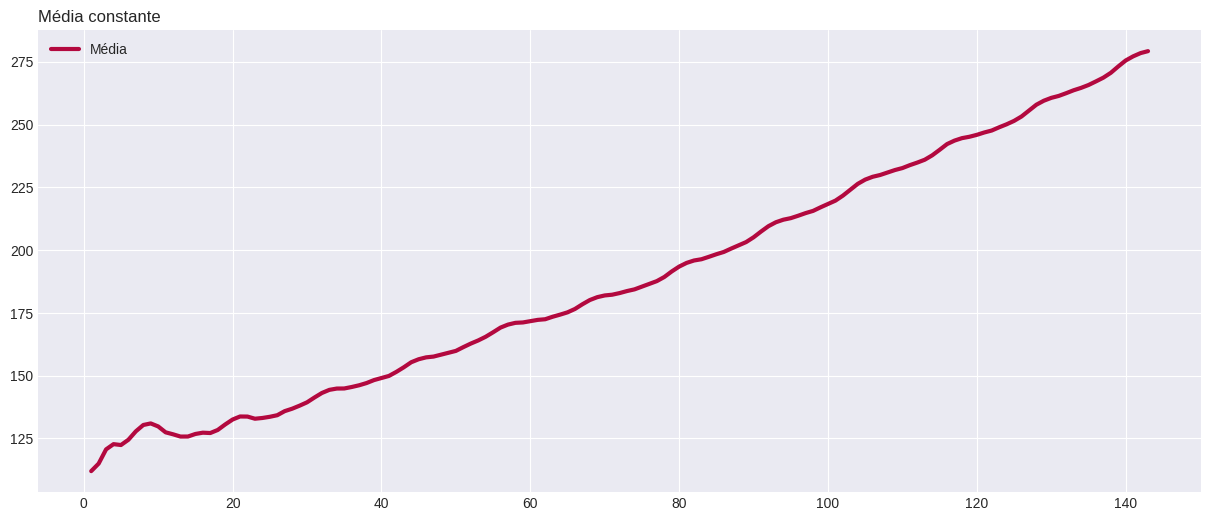

In [8]:
# Plot Média Constante
Media_Acumulada = [ np.mean( Registros[ :Loop ] ) for Loop in range( len(Registros) ) ]
plt.plot( Media_Acumulada, label='Média', linewidth=3, color=Vermelho )
plt.title('Média constante', loc='left')
plt.legend();

Analisar a média constante em uma série temporal é importante porque ajuda a identificar se existe ou não uma tendência de crescimento ou decrescimento nos valores da série ao longo do tempo. Se a média for constante, isso indica que não há uma tendência clara de crescimento ou decrescimento na série temporal, o que pode ser útil para tomar decisões ou fazer previsões.

## **Variância Constante**

Variância constante, também conhecida como homocedasticidade, é um conceito estatístico que se refere a uma série de dados em que a variação dos valores em torno da média é constante ao longo do tempo. Em outras palavras, se a variância é constante, a dispersão dos valores em torno da média é a mesma em todos os pontos da série temporal.

Analisar a variância constante em uma série temporal é importante porque ajuda a avaliar a precisão das estimativas estatísticas e a identificar se há problemas de variabilidade nos dados. Quando a variância não é constante, pode haver um padrão de aumento ou diminuição da variação ao longo do tempo, o que pode afetar a precisão das estimativas.

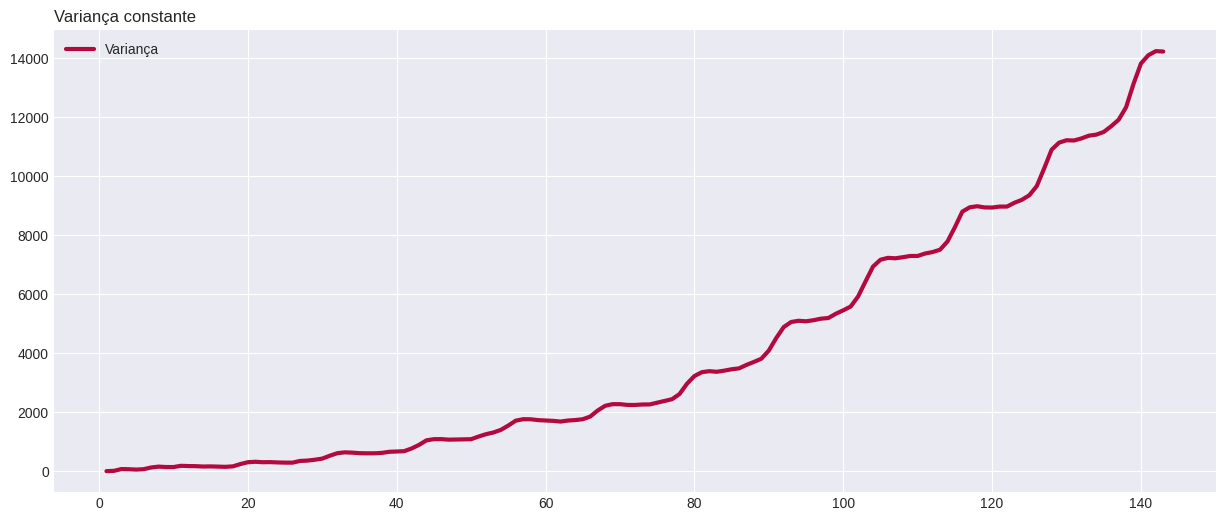

In [9]:
# Plot Variancia Constante
Varianca_Acumulada = [ np.var( Registros[ :Loop ] ) for Loop in range( len(Registros) ) ]
plt.plot( Varianca_Acumulada, label='Variança', linewidth=3, color=Vermelho )
plt.title('Variança constante', loc='left')
plt.legend();

## **Gráfico de autocorrelação de uma série temporal univariada**

Esse gráfico ajuda a visualizar a autocorrelação entre os valores da série em diferentes defasagens (lags) de tempo.

A autocorrelação é a correlação entre uma série temporal e suas defasagens. Isso significa que, em um gráfico de autocorrelação, a autocorrelação no lag 1 é a correlação entre a série temporal e seus valores uma unidade de tempo antes. A autocorrelação no lag 2 é a correlação entre a série temporal e seus valores duas unidades de tempo antes, e assim por diante.

Ao plotar o gráfico de autocorrelação, os valores da autocorrelação são plotados no eixo y em relação aos diferentes lags de tempo no eixo x. Se a autocorrelação for positiva para um lag específico, isso significa que os valores da série temporal estão correlacionados positivamente com os valores deslocados nesse lag. Por outro lado, se a autocorrelação for negativa, isso indica uma correlação negativa.

O gráfico de autocorrelação é útil para identificar padrões e sazonalidades em uma série temporal. Por exemplo, se houver uma autocorrelação positiva significativa em um lag específico, isso pode indicar que os valores da série temporal têm uma sazonalidade ou um padrão de repetição nesse período de tempo.

Em resumo, a função pd.plotting.autocorrelation_plot() é usada para plotar o gráfico de autocorrelação de uma série temporal, que pode ajudar a identificar padrões e sazonalidades na série, além de auxiliar em análises estatísticas e previsões.

[]

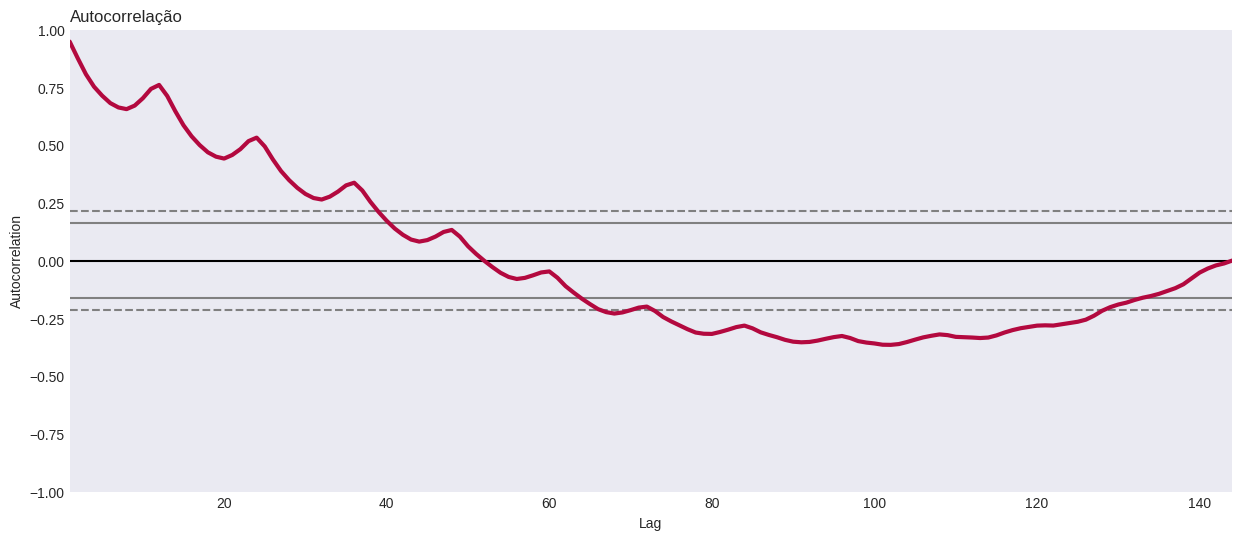

In [10]:
Grafico = pd.plotting.autocorrelation_plot( Registros, color=Vermelho, linewidth=3)
plt.title('Autocorrelação', loc='left')
Grafico.plot()

## **Grid de Gráficos**

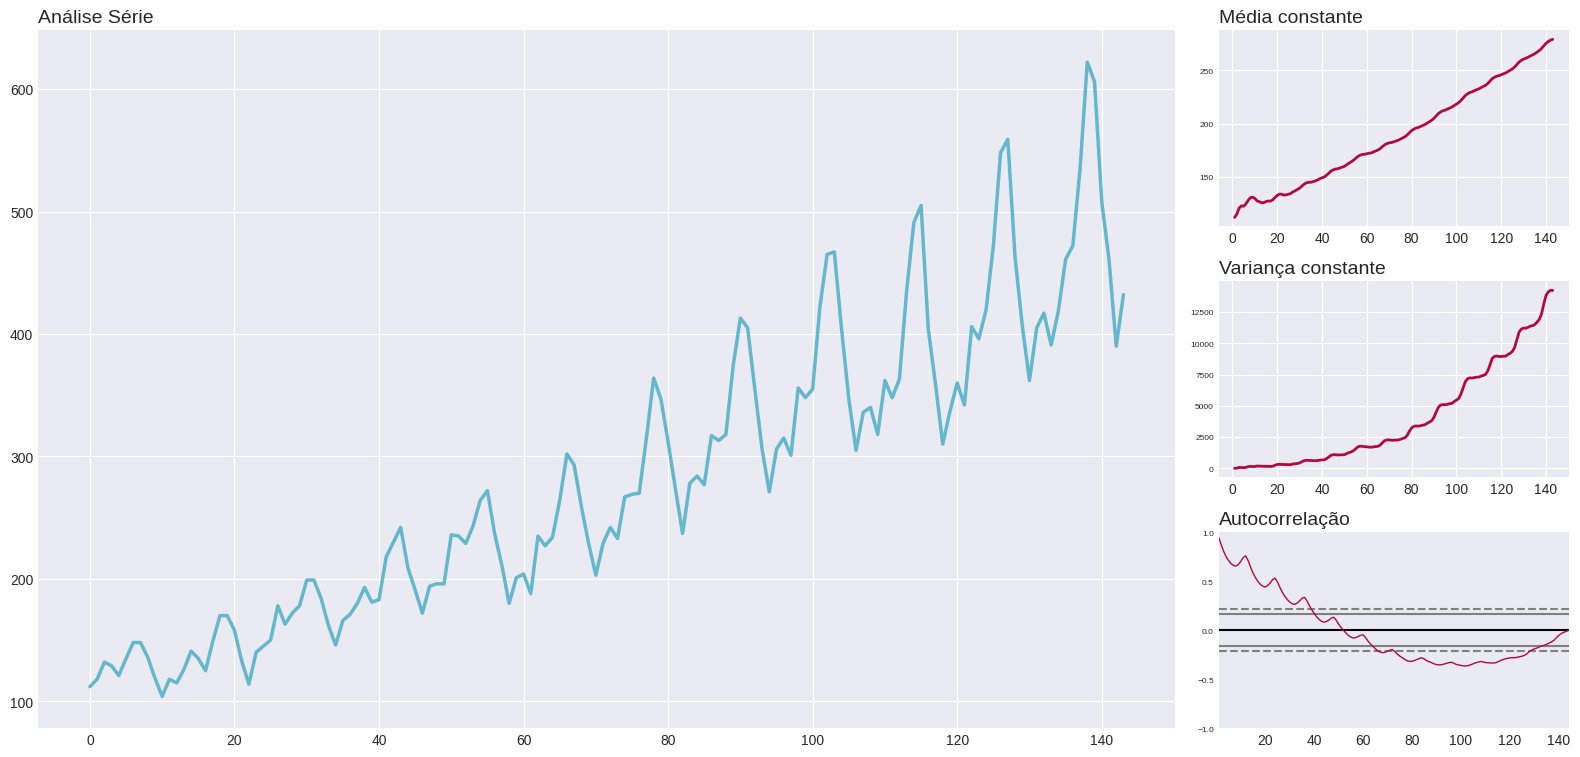

In [11]:
# Figura
Figura = plt.figure( figsize=(16, 10) )
Eixo = [ None for _ in range(12) ]

# Plots

# Serie
Eixo[0] = plt.subplot2grid( (4,4), (0, 0), colspan=3, rowspan=3 )
plt.title('Análise Série', loc='left', fontsize=14)
plt.plot( Registros, linewidth=2.5, color=Verde )

# Media
Eixo[1] = plt.subplot2grid( (4,4), (0, 3), colspan=1, rowspan=1 )
Media_Acumulada = [ np.mean( Registros[ :Loop ] ) for Loop in range( len(Registros) ) ]
plt.plot( Media_Acumulada, label='Média', linewidth=2, color=Vermelho )
plt.title('Média constante', loc='left', fontsize=14)
plt.yticks(fontsize=6)

# Variança
Eixo[2] = plt.subplot2grid( (4,4), (1, 3), colspan=1, rowspan=1 )
Varianca_Acumulada = [ np.var( Registros[ :Loop ] ) for Loop in range( len(Registros) ) ]
plt.plot( Varianca_Acumulada, label='Variança', linewidth=2, color=Vermelho )
plt.title('Variança constante', loc='left', fontsize=14)
plt.yticks(fontsize=6)

# Autocorrelação
Eixo[3] = plt.subplot2grid( (4,4), (2, 3), colspan=1, rowspan=1 )
Grafico = pd.plotting.autocorrelation_plot( Registros, color=Vermelho, linewidth=1)
plt.title('Autocorrelação', loc='left', fontsize=14)
plt.ylabel('')
plt.xlabel('')
plt.yticks(fontsize=6)

# Ajuste
Figura.tight_layout()


## **Teste de Dickey-Fuller**

O teste de Dickey-Fuller (também conhecido como teste ADF - Augmented Dickey-Fuller) é um teste estatístico usado para verificar se uma série temporal tem uma raiz unitária. Uma série temporal com uma raiz unitária é aquela em que a média e a variância mudam ao longo do tempo, o que pode tornar difícil modelá-la e prever seus valores futuros.

O teste de Dickey-Fuller avalia a hipótese nula de que uma série temporal tem uma raiz unitária, o que significa que a série não é estacionária. Se o valor-p (p-value) do teste for menor que um nível de significância pré-definido, a hipótese nula é rejeitada e conclui-se que a série é estacionária.

O teste de Dickey-Fuller é amplamente utilizado em análises de séries temporais e é especialmente útil em modelos de previsão, pois os modelos são mais precisos quando a série é estacionária. Além disso, o teste pode ajudar a identificar tendências e padrões na série temporal, o que pode ser útil para prever seus valores futuros.

O teste de Dickey-Fuller é um dos testes mais comuns para verificar a estacionariedade de uma série temporal, mas existem outras variantes, como o teste de Phillips-Perron e o teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin). Cada um desses testes tem suas próprias hipóteses e pode ser mais apropriado para diferentes tipos de séries temporais.

In [12]:
# Função Dicker
def Teste_fuller( Dados ):

  '''
    Função para teste de fuller
  '''

  # Aplicando teste
  Teste = adfuller( Dados )

  # Organizando os dados
  Dicionario = {
      'Teste Fuller' : Teste[0],
      'Valor P' : round( Teste[1], 4 ),
      'Lags Usadas' : Teste[2],
      'Nº Obs usadas' : Teste[3],
      'Valores Críticos 1%' : Teste[4]['1%'],
      'Valores Críticos 5%' : Teste[4]['5%'],
      'Valores Críticos 10%' : Teste[4]['10%']
  }

  # Ajustando a Tabela
  Tabela = pd.DataFrame( Dicionario, index=[0] ).transpose()
  Tabela.columns = ['']

  return Tabela

Os resultados do teste de Dickey-Fuller são usados para determinar se a série temporal é estacionária ou não. O teste fornece uma estatística de teste e um valor-p (p-value) que indica a probabilidade de obter os resultados observados sob a hipótese nula de que a série é não estacionária (tem uma raiz unitária).

Por exemplo, suponha que o valor-p do teste de Dickey-Fuller seja de 0,02 e o nível de significância seja de 5%. Nesse caso, como o valor-p é menor que o nível de significância, rejeita-se a hipótese nula e conclui-se que a série é estacionária.

É importante lembrar que o teste de Dickey-Fuller é apenas um dos testes de estacionariedade disponíveis e que a interpretação dos resultados deve ser feita em conjunto com outras análises e com o conhecimento do contexto da série temporal. Além disso, é preciso avaliar a adequação do modelo e a precisão das previsões antes de fazer qualquer conclusão sobre a estacionariedade da série.

In [13]:
Tab_Dados = Teste_fuller( Registros )
      
Tab_Dados

,
Teste Fuller,0.815369
Valor P,0.991900
Lags Usadas,13.000000
Nº Obs usadas,130.000000
Valores Críticos 1%,-3.481682
Valores Críticos 5%,-2.884042
Valores Críticos 10%,-2.578770


O valor da estatística de teste de Dickey-Fuller é 0.815369.
<br>
O valor-p do teste é 0.991900, 
<br>
<br> 
O que é maior que o nível de significância de 5%. 
<br>
Isso indica que não há evidência suficiente para rejeitar a hipótese nula de que a série é não estacionária.

## **Divisão de Teste e Treino**

In [14]:
# Metricas de divisão
Teste = 0.25
Treino = 0.75
Tamanho = len( Base_Dados )

Divisao_Teste = round( Tamanho * Teste )
Divisao_Treino = round( Tamanho * Treino )

#Dados_Treino, Dados_Teste = Base_Dados[0: Divisao_Treino ], Base_Dados[-Divisao_Teste: ]
Dados_Treino = Base_Dados[0: Divisao_Treino ]
Dados_Teste = Base_Dados[Divisao_Treino: ]

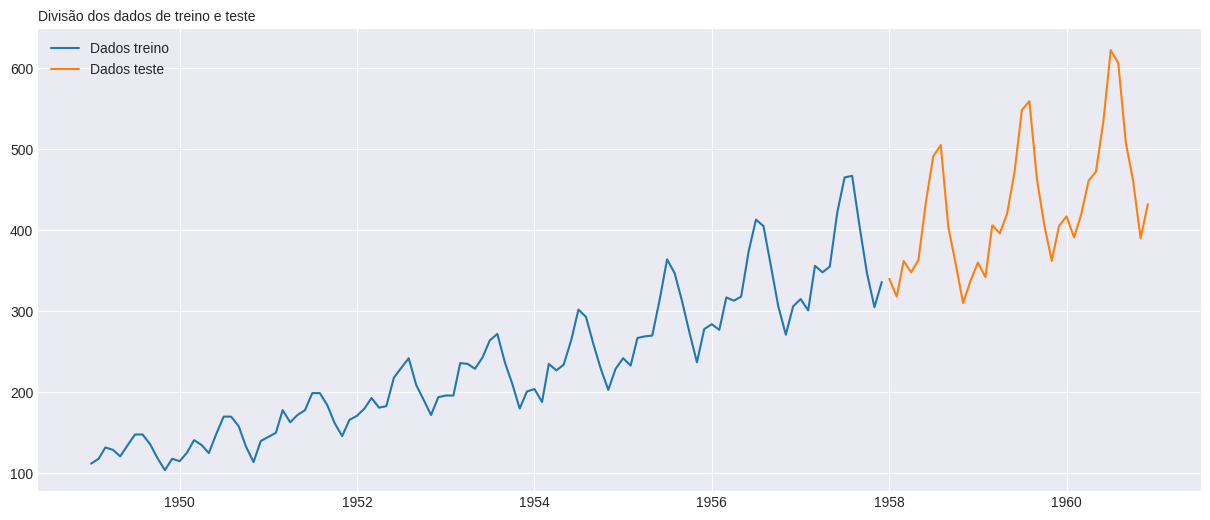

In [15]:
# Plot
plt.title('Divisão dos dados de treino e teste', loc='left', fontsize=10)
plt.plot( Dados_Treino )
plt.plot( Dados_Teste )
plt.legend( ['Dados treino', 'Dados teste'] );

## **Decomposição da série**

A função "seasonal_decompose" da biblioteca "statsmodels.tsa.seasonal" é usada para decompor uma série temporal em seus componentes: tendência, sazonalidade e resíduo.

**Tendência** é a direção geral da série temporal, ou seja, se ela está subindo, descendo ou permanece constante ao longo do tempo.

**Sazonalidade** é um padrão repetitivo que ocorre em intervalos regulares, como padrões semanais, mensais ou anuais.

**Resíduo** é a parte não explicada da série temporal, que é a diferença entre a série original e as componentes de tendência e sazonalidade.

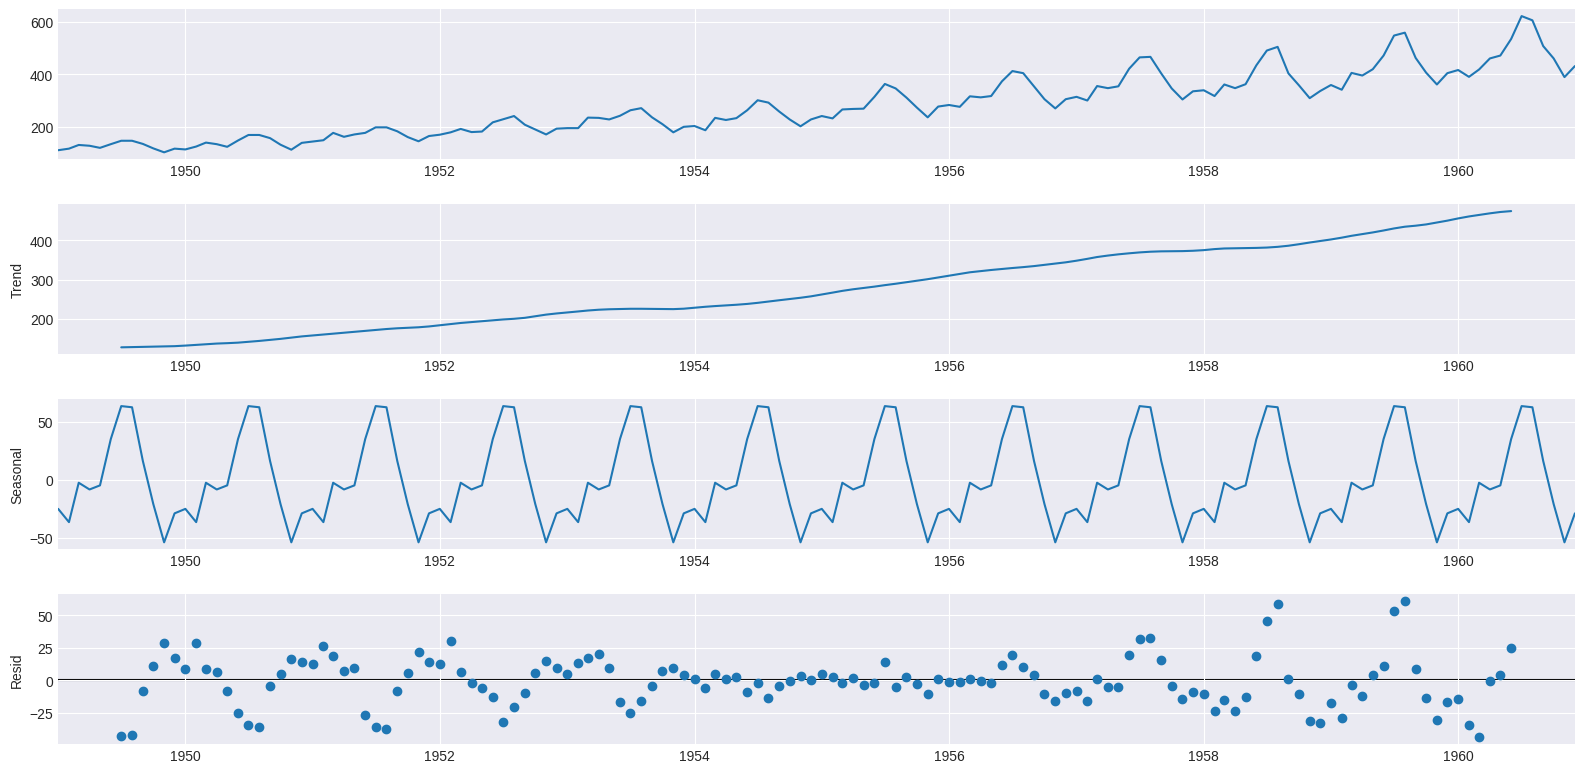

In [17]:
# Função
# Função
from statsmodels.tsa.seasonal import seasonal_decompose

# Criar um grid
Grid = seasonal_decompose( Base_Dados )
Figura_Decomposicao = Grid.plot()
Figura_Decomposicao.set_size_inches(16, 8)

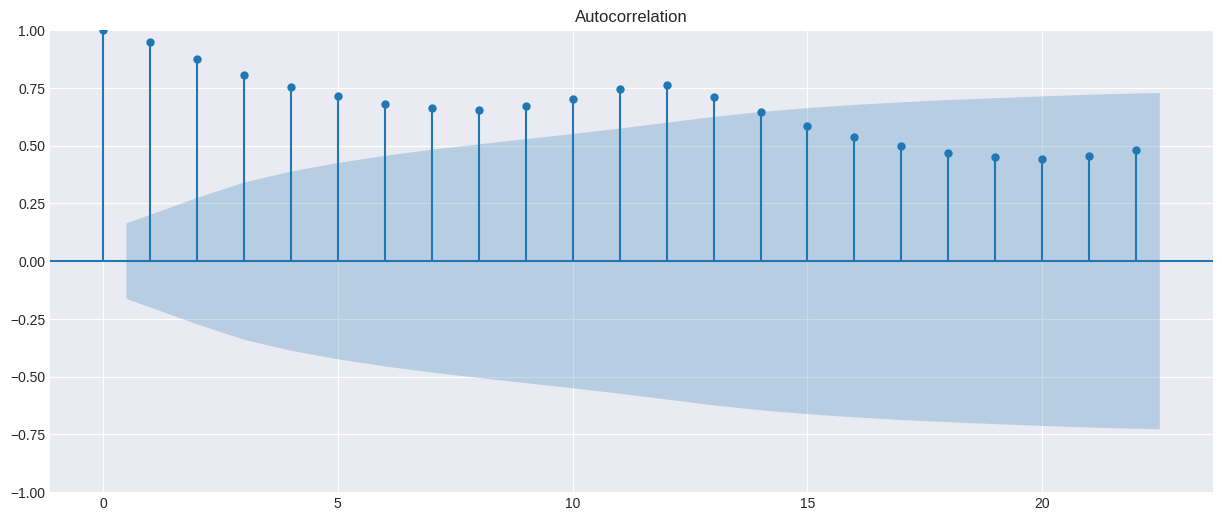

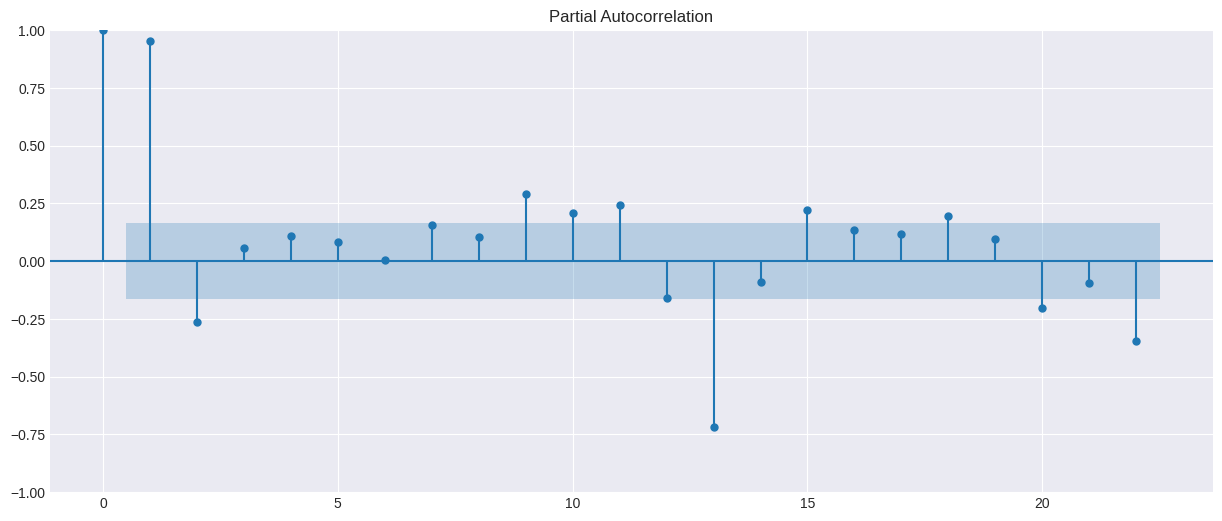

In [18]:
# Autocorrelação e CorrelaçãoParcial
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelação (ACF)
plot_acf( Base_Dados )

# Autocorrelação parcial (PACF) 
plot_pacf( Base_Dados );

O gráfico de **autocorrelação (ACF)** mostra a correlação entre a série e suas versões atrasadas, ou seja, o quanto o valor atual da série está correlacionado com o valor da série em momentos anteriores.

Um padrão comum em um gráfico de ACF é uma queda gradual na correlação à medida que o intervalo de tempo aumenta. Isso é conhecido como decaimento da autocorrelação e é comum em muitas séries temporais. Se o decaimento da autocorrelação for rápido, isso pode indicar que a série é estacionária e pode ser modelada por um modelo ARIMA. Por outro lado, se o decaimento da autocorrelação for lento, isso pode indicar que a série é não estacionária e requer algum tipo de transformação.

------------------------------------------------------------------

O gráfico de **autocorrelação parcial (PACF)** mostra a correlação entre a série e suas versões atrasadas, mas controlando o efeito das correlações intermediárias.

Uma interpretação típica do gráfico de PACF é que ele ajuda a identificar o número de termos autorregressivos (AR) em um modelo ARIMA. Um padrão comum em um gráfico de PACF é uma queda acentuada na correlação para um valor próximo de zero após o primeiro pico significativo. Isso sugere que um modelo ARIMA pode ser apropriado com um número de termos AR igual ao número de intervalos de tempo em que a correlação é significativa.

## **Auto Arima**

In [19]:
# Instalar o AutoArima
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.8 MB/s eta 0:00:00


**ARIMA** é uma técnica estatística popular para modelar séries temporais, que envolve a identificação de parâmetros para os componentes de autocorrelação (AR) e média móvel (MA) da série. No entanto, a seleção manual desses parâmetros pode ser um processo tedioso e propenso a erros.

O "**Auto_arima**" ajuda a automatizar esse processo, permitindo que o usuário especifique uma série temporal e alguns parâmetros de configuração. Em seguida, a função testa automaticamente várias configurações de parâmetros ARIMA e seleciona o melhor modelo com base em um critério de seleção, como o Critério de Informação de Akaike (AIC) ou o Critério de Informação Bayesiana (BIC).

In [20]:
# Função
from pmdarima.arima import auto_arima

In [21]:
# Criação do Modelo
Modelo_Arima = auto_arima( 
    
    # série temporal que será usada para ajustar o modelo ARIMA
    Dados_Treino,

    # especifica o teste de estacionariedade a ser usado para identificar se a série temporal precisa ser diferenciada ou não. 
    # O valor padrão é "adf" para o teste ADF (Dickey-Fuller Aumentado).
    test='adf', 

    # especifica se o modelo ARIMA deve incluir componentes sazonais ou não
    seasonal=False,

    # especifica o número inicial de termos AR e MA para considerar durante a busca por modelos.
    start_p=0, start_q=0,

    # especifica o número máximo de termos AR e MA para considerar durante a busca por modelos.
    max_p=5, max_q=5,

    # especifica o número de períodos em uma temporada. Este parâmetro só é relevante se "seasonal=True"
    m=1,

    # especifica o número de vezes que a série temporal será diferenciada. Se for definido como "None", o algoritmo tentará determinar o melhor valor.
    d=1,

    # especifica se a seleção de modelos deve ser feita de forma passo a passo ou exaustiva. 
    stepwise=True,

    # especifica se a saída de diagnóstico deve ser impressa durante o processo de seleção de modelos
    trace=False 
  )

In [22]:
# Criando as previsões
Previsoes = Modelo_Arima.predict( len(Dados_Teste) )

In [23]:
Previsoes.values

array([344.10763919, 365.85163563, 394.82738938, 423.27661391,
       444.29100594, 453.58670102, 450.41299871, 437.43082419,
       419.68763892, 403.04617732, 392.53816475, 391.09123793,
       398.936283  , 413.79191851, 431.70566122, 448.2662619 ,
       459.82827338, 464.41942711, 462.11653064, 454.8376656 ,
       445.65972652, 437.88763416, 434.1474547 , 435.74437495,
       442.433462  , 452.62695334, 463.94262027, 473.91502714,
       480.66411546, 483.34576482, 482.28345464, 478.77486399,
       474.65495856, 471.75494911, 471.41168782, 474.15442499])

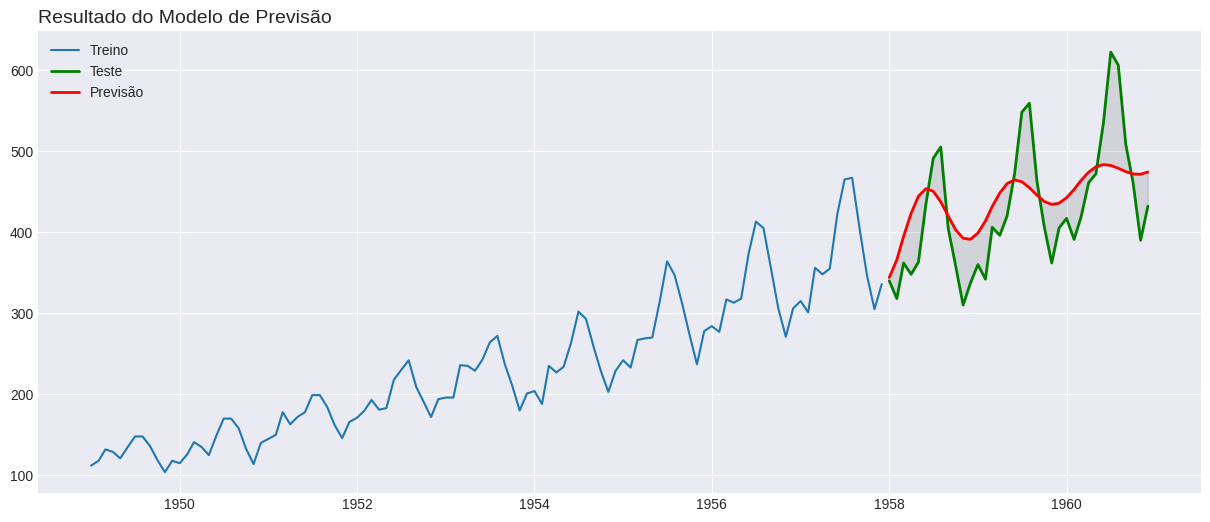

In [24]:
plt.plot( Dados_Treino )
plt.plot( Dados_Teste, linewidth=2, color='green' )
plt.plot( Previsoes, linewidth=2, color='red' )
plt.fill_between( Dados_Teste.index, Previsoes.values, Dados_Teste['#Passengers'].values, interpolate=True, color='black', alpha=0.1  )
plt.title('Resultado do Modelo de Previsão', loc='left', fontsize=14 )
plt.legend( ['Treino', 'Teste', 'Previsão'] );

In [ ]:
# Metricas de avaliação

**MSE** (Mean Squared Error): é a média dos erros quadrados entre as previsões e os valores reais. Quanto menor o valor do MSE, melhor a qualidade da previsão.


**RMSE** (Root Mean Squared Error): é a raiz quadrada da média dos erros quadrados. Ele fornece uma estimativa da magnitude média dos erros. Como a métrica é calculada na mesma escala dos dados originais, ela é fácil de interpretar. Quanto menor o valor do RMSE, melhor a qualidade da previsão.


**MAE** (Mean Absolute Error): é a média dos valores absolutos dos erros entre as previsões e os valores reais. Ele mede a magnitude média dos erros, mas não leva em consideração a direção dos erros. Como o MAE é calculado na mesma escala dos dados originais, ele também é fácil de interpretar. Quanto menor o valor do MAE, melhor a qualidade da previsão.

**MAPE** (Mean Absolute Percentage Error): é a média dos valores absolutos das diferenças percentuais entre as previsões e os valores reais, dividida pelo valor real. É uma medida de erro percentual, o que significa que ela permite que você compare a qualidade das previsões em diferentes séries temporais, independentemente de suas unidades de medida. Quanto menor o valor do MAPE, melhor a qualidade da previsão.

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Real = Dados_Teste['#Passengers'].values

MSE = mean_squared_error( Real, Previsoes )
RMSE = mean_squared_error( Real, Previsoes , squared=False )
MAE = mean_absolute_error( Real, Previsoes )
MAPE = np.mean( np.abs( (Real - Previsoes) / Real) ) * 100

MSE, MAE, RMSE, MAPE

Labels = ['MSE', 'MAE', 'RMSE', 'MAPE']
Values = [ MSE, MAE, RMSE, MAPE ]
Dicionario = { 'Labels':Labels, 'Valores':Values }
Tab_Metricas = pd.DataFrame( Dicionario )
Tab_Metricas

,Labels,Valores
0,MSE,3505.371657
1,MAE,49.488308
2,RMSE,59.206179
3,MAPE,11.654169
